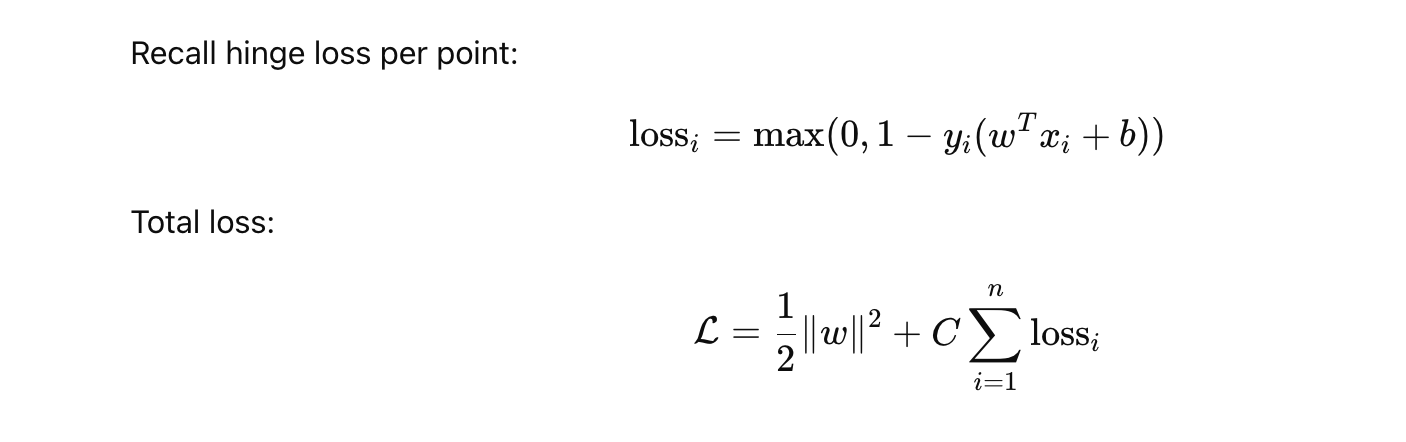

In [3]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt



In [4]:
class LinearSVM:
    def __init__(self,
                 lr : float = 0.001,
                 lambda_params : float = 0.01,
                 n_iters : int = 1000):
        self.lr = lr
        self.lambda_params = lambda_params
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self,x,y):
        n_samples, n_features = x.shape[0], x.shape[1]
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(x):
                condition = y[idx] * (np.dot(x_i,self.w) + self.b) >= 1
                if condition:
                    dw = 2 * self.lambda_params * self.w
                    db = 0
                else:
                    dw = 2 * self.lambda_params * self.w - np.dot(x_i, y[idx])
                    db = -y[idx]

                self.w -= self.lr * dw
                self.b -= self.lr * db

    def predict(self,x):
        return np.sign(np.dot(x,self.w) + self.b)
    



In [10]:
# creating the dummy data
x, y = make_blobs(n_samples=1000, centers=3, random_state=42)
y = np.where(y == 0, -1, 1)

In [11]:
svm = LinearSVM(lr=0.001,
                lambda_params=0.01,
                n_iters=1000)

svm.fit(x,y)
predictions = svm.predict(x)

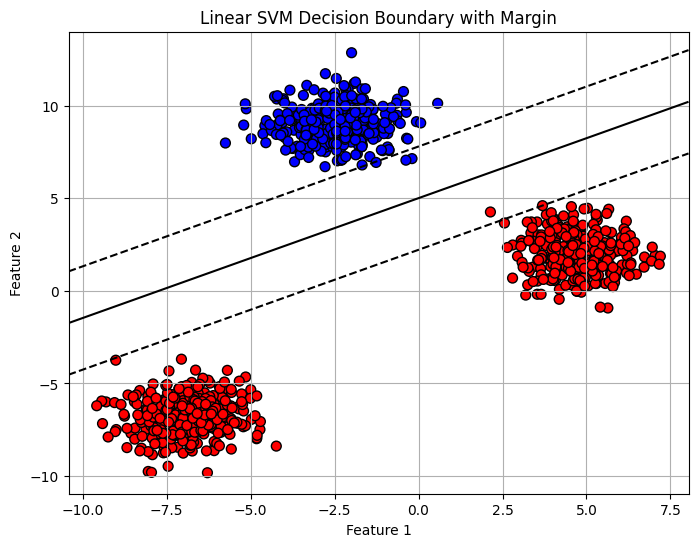

In [12]:
def plot_svm(X, y, model):
    plt.figure(figsize=(8, 6))

    # Plot data points
    plt.scatter(X[:, 0], x[:, 1], c=y, cmap='bwr', s=50, edgecolors='k')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 50)
    yy = np.linspace(ylim[0], ylim[1], 50)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.w.dot(xy.T) + model.b
    Z = Z.reshape(XX.shape)

    # Plot decision boundary and margins
    plt.contour(XX, YY, Z, levels=[-1, 0, 1], linestyles=["--", "-", "--"], colors='k')
    plt.title("Linear SVM Decision Boundary with Margin")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

# Call the plotting function
plot_svm(x, y, svm)